In [1]:
import os
import django
from django.db import connection
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'activity_viewer.settings')
django.setup()

In [2]:
from dashboard.models import Log, Item

In [3]:
files_downloaded = Log.objects.values_list('s3_key').filter(http_status=200)

In [4]:
%%time
df = pd.DataFrame(files_downloaded, columns=['key'])

CPU times: user 1.72 s, sys: 695 ms, total: 2.42 s
Wall time: 1min 12s


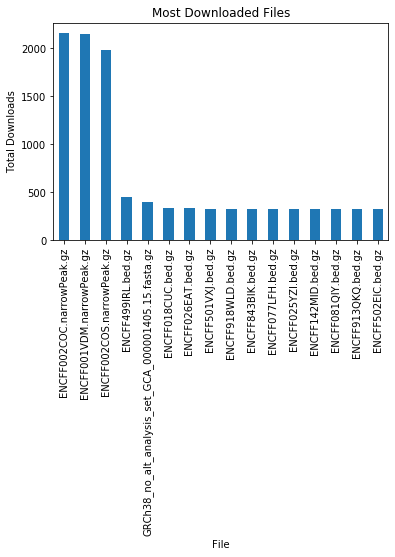

In [5]:
counts = df.groupby(by='key').size().sort_values(ascending=False)
counts_graph = counts.head(16)
axes = counts_graph.plot(kind='bar')
pretty_labels = [key.split('/')[-1] for key in counts_graph.index]
axes.set(xlabel='File', xticklabels=pretty_labels, ylabel='Total Downloads', title='Most Downloaded Files')
plt.show()

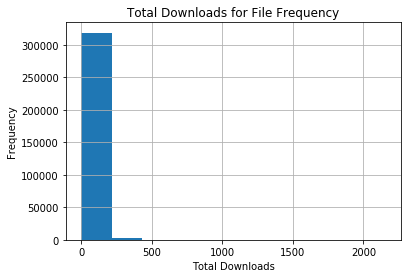

In [6]:
axes = counts.hist()
axes.set(xlabel='Total Downloads', ylabel='Frequency', title='Total Downloads for File Frequency')
plt.show()

In [7]:
print(f'Mean Downloads: {counts.mean():.1f}, Standard Deviation: {counts.std():.1f}')

Mean Downloads: 11.0, Standard Deviation: 33.4


In [8]:
unique_files_downloaded = df.drop_duplicates().size
available_files = Item.objects.count()
print(f'Files Downloaded: {unique_files_downloaded}, Files Available {available_files}, Percent Accessed: {(unique_files_downloaded / available_files):.0%}')

Files Downloaded: 321819, Files Available 442361, Percent Accessed: 73%


In [9]:
print(connection.queries)

[{'sql': 'SELECT "dashboard_log"."s3_key" FROM "dashboard_log" WHERE "dashboard_log"."http_status" = 200', 'time': '70.577'}, {'sql': 'SELECT COUNT(*) AS "__count" FROM "dashboard_item"', 'time': '0.422'}]
